In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 查看当前目录
os.getcwd()

'd:\\Projects\\Codes\\sichuan\\gr'

In [4]:
# 切换工作目录
# os.chdir('/home/maveray/Codes/sichuan/gr')
os.getcwd()

'd:\\Projects\\Codes\\sichuan\\gr'

In [5]:
# 解压数据集
if not os.path.exists("dataset"):
    !unzip ../zqy/dataset/2024年四川省大学生数据科学与统计建模竞赛.zip

In [6]:
# 重命名文件夹
!mv 2024年四川省大学生数据科学与统计建模竞赛 dataset
# 配置数据集路径
train_folder = './dataset/训练集'
test_folder = './dataset/测试集'
train_csv = os.path.join(train_folder, 'train_data.csv')
test_csv = os.path.join(test_folder, 'test_data.csv')
train_target = os.path.join(train_folder, 'train_target.csv')

'mv' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [7]:
# 读取数据
train_data = pd.read_csv(train_csv)
train_target = pd.read_csv(train_target)
test_data = pd.read_csv(test_csv)

### 数据说明

特征：数据包括客户基本信息类（x0-x20），征信数据-历史金融借贷类（x20-x256）、征信数据-其他行为类（x256-x3805）

风险标签：客户在授信后是否发生逾期，其中y=1代表逾期，y=0代表未逾期。

时间变量：变量date记录了客户的授信所属的阶段。

样本量：总计8万，其中训练集数据量6.2万，测试集数据量1.8万。训练集正样本（y=1）约占比18%。测试集正样本占比11%。

说明：相关数据经过脱敏，分层抽样、模拟转换等处理，不涉及客户隐私，不反映金融机构真实业务数据指标。


In [8]:
# 定义数据特征组
columns = train_data.columns
feature_groups = [columns[1:21], columns[21:257], columns[257:]]
print([len(g) for g in feature_groups])

[20, 236, 3550]


#### 数据缺失情况

In [9]:
# 计算缺失数据比例
missing_ratio_g1 = train_data[feature_groups[0]].isnull().sum() / len(train_data)
missing_ratio_g2 = train_data[feature_groups[1]].isnull().sum() / len(train_data)
missing_ratio_g3 = train_data[feature_groups[2]].isnull().sum() / len(train_data)

In [10]:
missing_ratio_g2 = missing_ratio_g2.sort_values(ascending=False)
missing_ratio_g3 = missing_ratio_g3.sort_values(ascending=False)

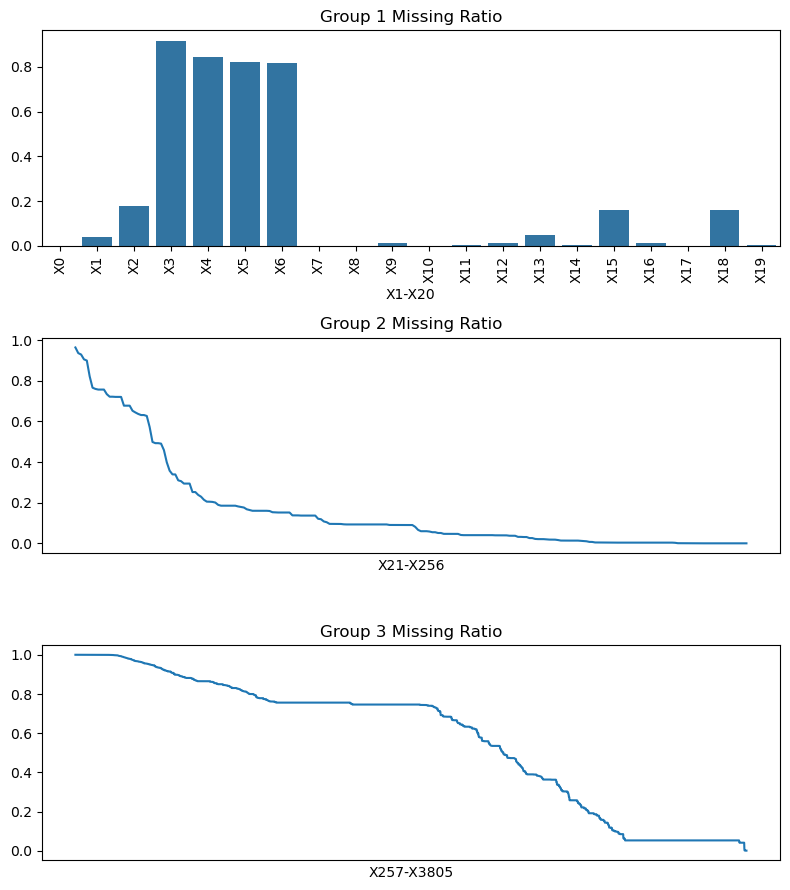

In [11]:
# 将缺失比例绘图
plt.figure(figsize=(8, 9))
plt.subplot(3, 1, 1)
sns.barplot(missing_ratio_g1.values)
plt.title('Group 1 Missing Ratio')
plt.xticks(range(len(feature_groups[0])), [f'X{i}' for i in range(len(feature_groups[0]))], rotation=90)
plt.xlabel('X1-X20')
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(missing_ratio_g2.values)
plt.title('Group 2 Missing Ratio')
plt.xticks([])
plt.xlabel('X21-X256')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(missing_ratio_g3.values)
plt.title('Group 3 Missing Ratio')
plt.xticks([])
plt.xlabel('X257-X3805')
plt.tight_layout()

plt.savefig('./imgs/missing_ratio.png')
plt.show()

In [12]:
# 对缺失比例进行排序
missing_ratio_g1 = missing_ratio_g1.sort_values(ascending=False)
missing_ratio_g2 = missing_ratio_g2.sort_values(ascending=False)
missing_ratio_g3 = missing_ratio_g3.sort_values(ascending=False)

In [13]:
# 计算所有数据实例在全部特征上的缺失比例
idx = train_data.index
missing_ratio_instances = train_data.loc[idx, train_data.columns[1:]].isnull().sum(axis=1) / train_data.shape[1]
missing_ratio_instances = missing_ratio_instances.sort_values(ascending=False)
# 计算所有数据实例在特征组1上的缺失比例
missing_ratio_instances_g1 = train_data.loc[idx, feature_groups[0]].isnull().sum(axis=1) / train_data[feature_groups[0]].shape[1]
missing_ratio_instances_g1 = missing_ratio_instances_g1.sort_values(ascending=False)
# 计算所有数据实例在特征组2上的缺失比例
missing_ratio_instances_g2 = train_data.loc[idx, feature_groups[1]].isnull().sum(axis=1) / train_data[feature_groups[1]].shape[1]
missing_ratio_instances_g2 = missing_ratio_instances_g2.sort_values(ascending=False)
# 计算所有数据实例在特征组3上的缺失比例
missing_ratio_instances_g3 = train_data.loc[idx, feature_groups[2]].isnull().sum(axis=1) / train_data[feature_groups[2]].shape[1]
missing_ratio_instances_g3 = missing_ratio_instances_g3.sort_values(ascending=False)

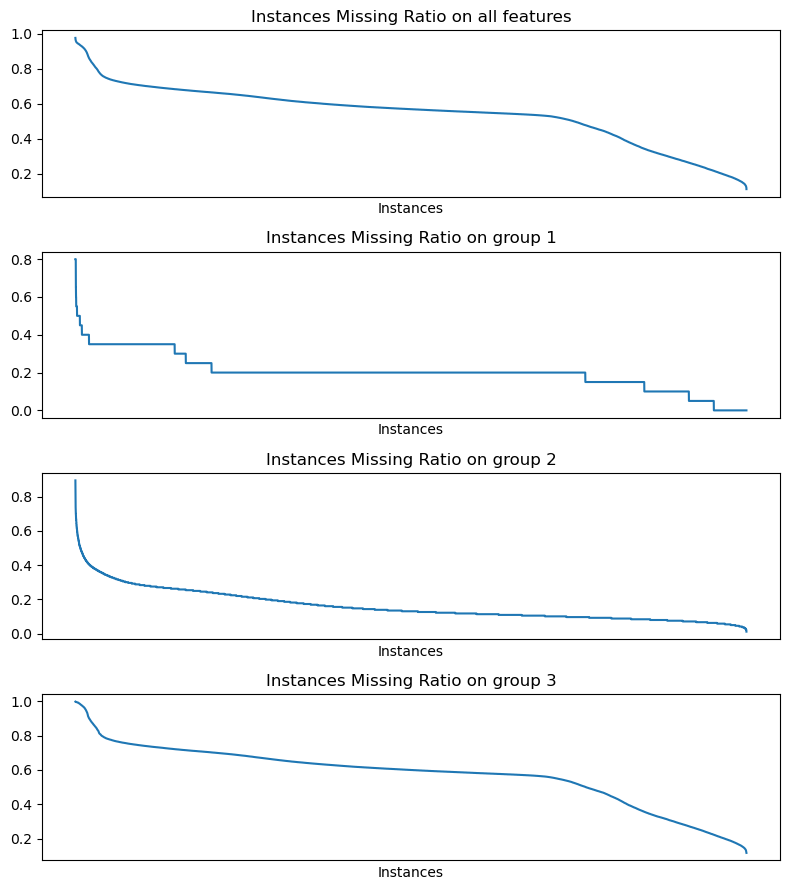

In [14]:
plt.figure(figsize=(8, 9))

plt.subplot(4, 1, 1)
plt.plot(missing_ratio_instances.values)
plt.title('Instances Missing Ratio on all features')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.subplot(4, 1, 2)
plt.plot(missing_ratio_instances_g1.values)
plt.title('Instances Missing Ratio on group 1')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.subplot(4, 1, 3)
plt.plot(missing_ratio_instances_g2.values)
plt.title('Instances Missing Ratio on group 2')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.subplot(4, 1, 4)
plt.plot(missing_ratio_instances_g3.values)
plt.title('Instances Missing Ratio on group 3')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.savefig('./imgs/missing_ratio_instances.png')

plt.show()

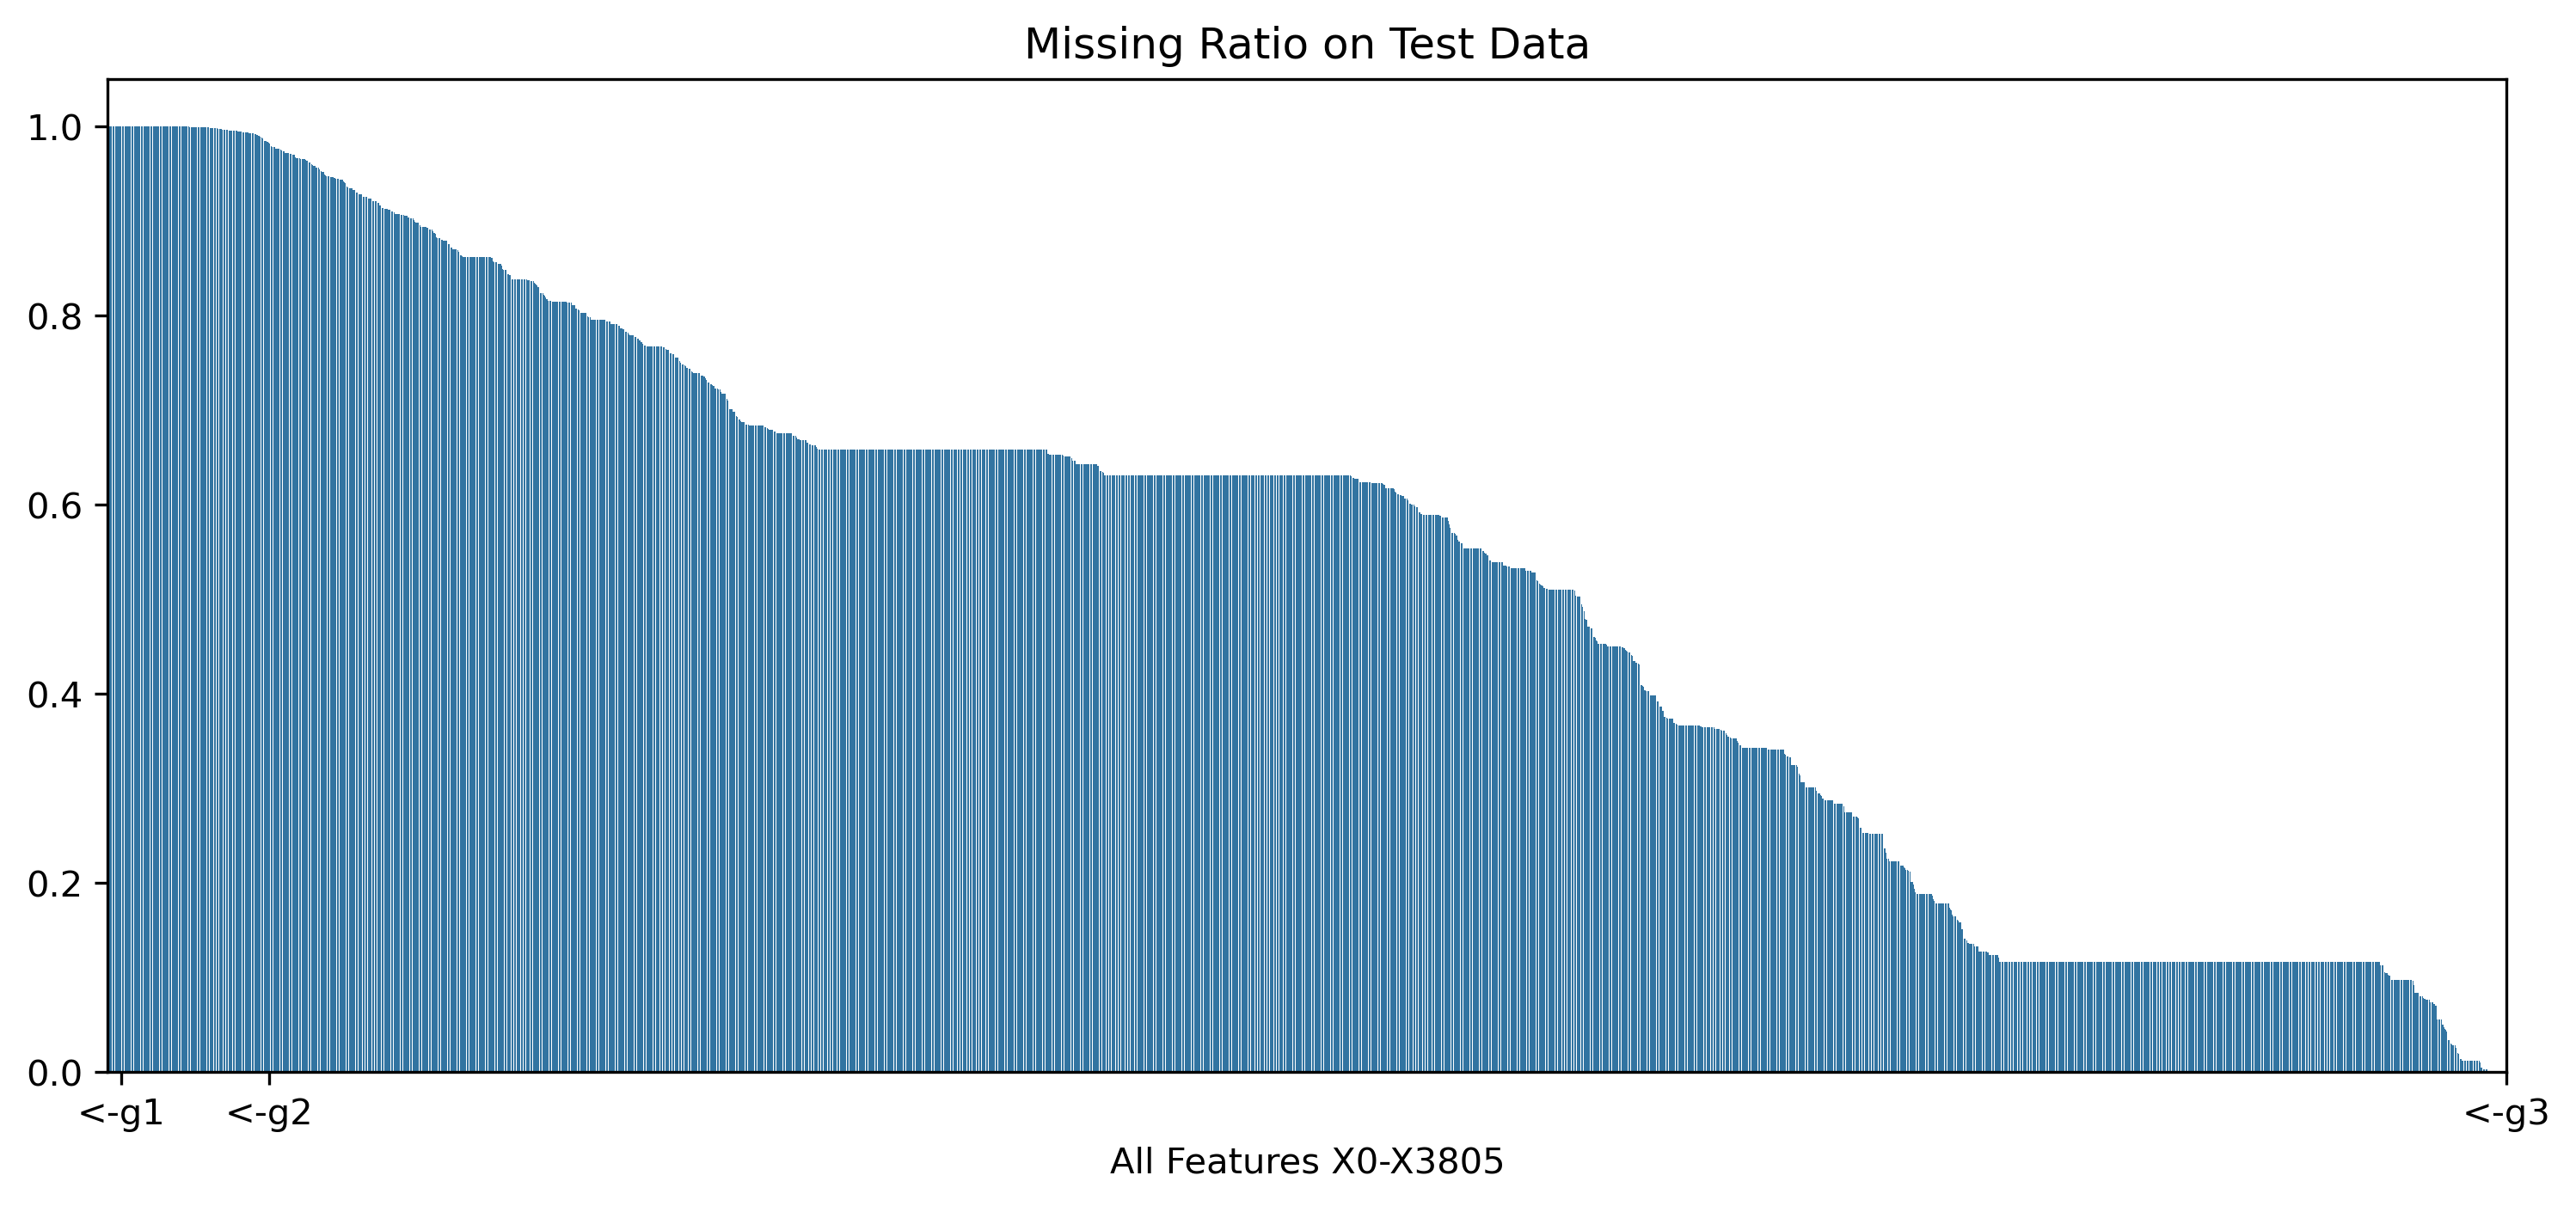

In [15]:
# 测试集数据缺失情况
missing_ratio_test = test_data[test_data.columns[1:]].isnull().sum() / len(test_data)
missing_ratio_test = missing_ratio_test.sort_values(ascending=False)

plt.figure(figsize=(12, 5), dpi=300)
sns.barplot(x=range(len(missing_ratio_test)), y=missing_ratio_test.values)
plt.title('Missing Ratio on Test Data')
plt.xticks([21, 256, 3805], ['<-g1', '<-g2', '<-g3'])
plt.xlabel('All Features X0-X3805')

plt.show()

#### 数据分布

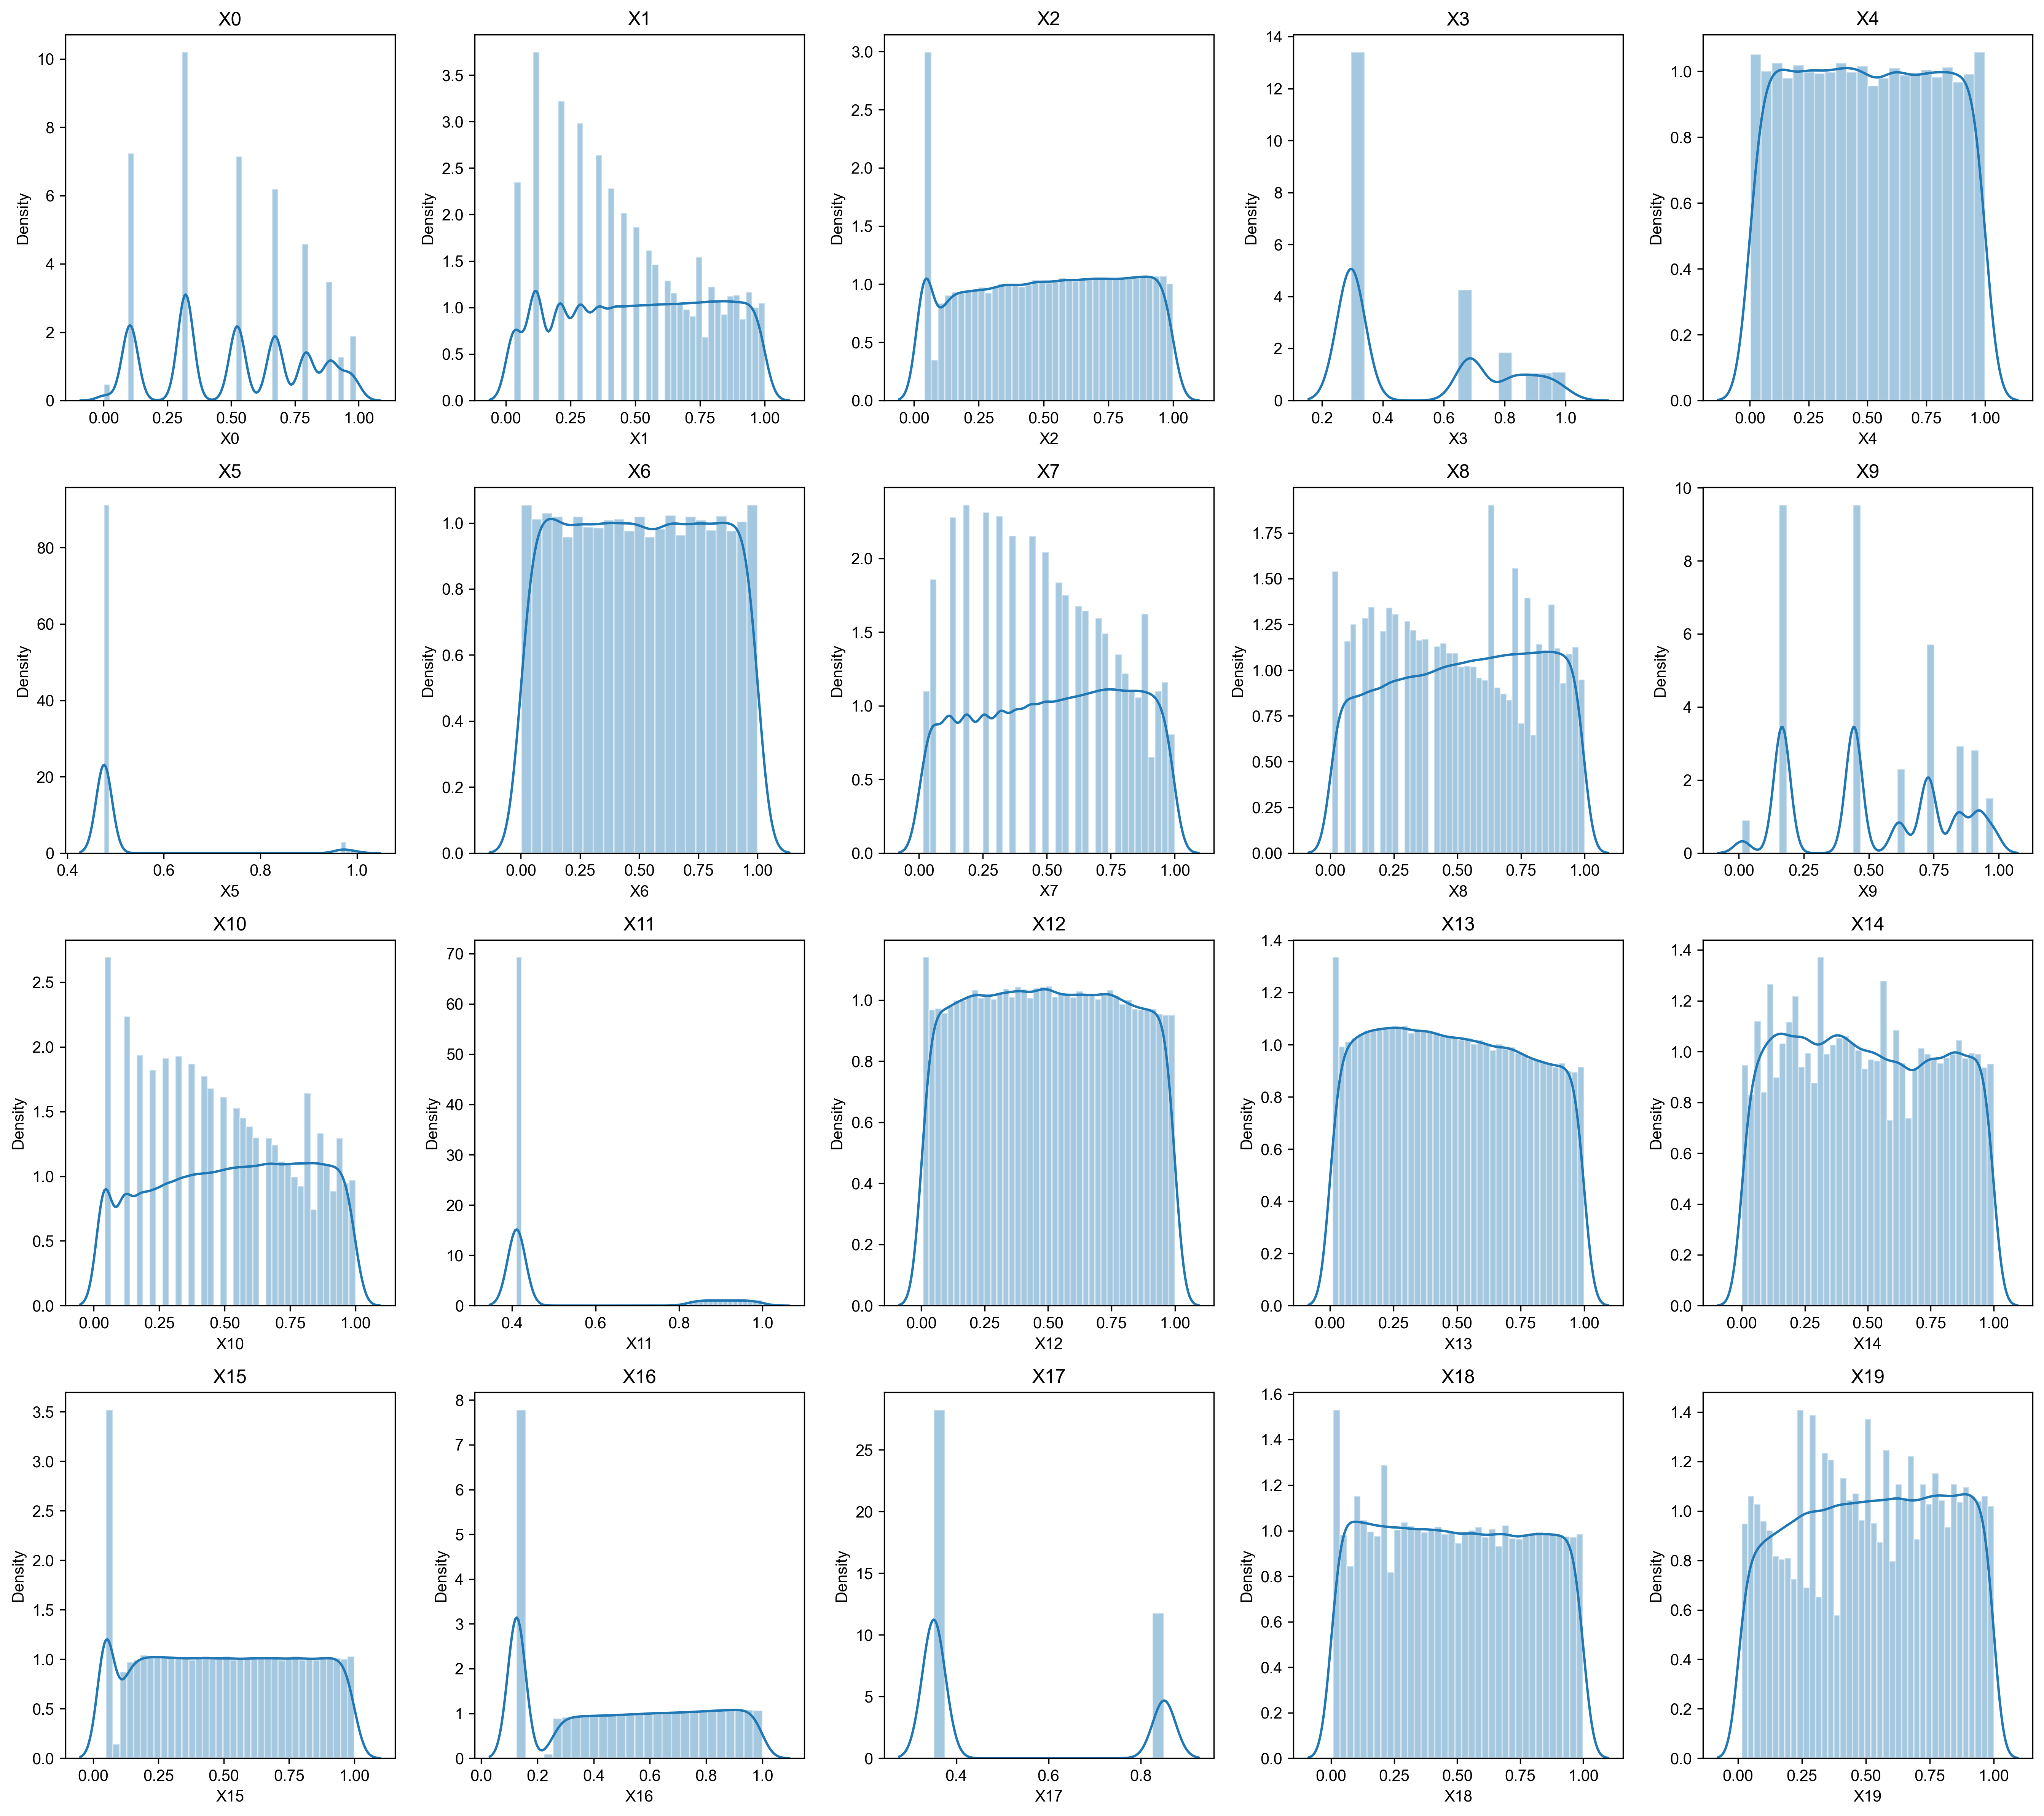

In [16]:
# 绘制g1的特征分布

fig, axs = plt.subplots(4, 5, figsize=(18, 16), dpi=300)

# 在每个子图中绘制一个图
sns.set_style("whitegrid")
for i in range(len(feature_groups[0])):
    sns.distplot(train_data[feature_groups[0]].iloc[:, i], ax=axs[i // 5, i % 5])
    axs[i // 5, i % 5].set_title(f'X{i}')
    plt.tight_layout()

# 显示图
plt.show()

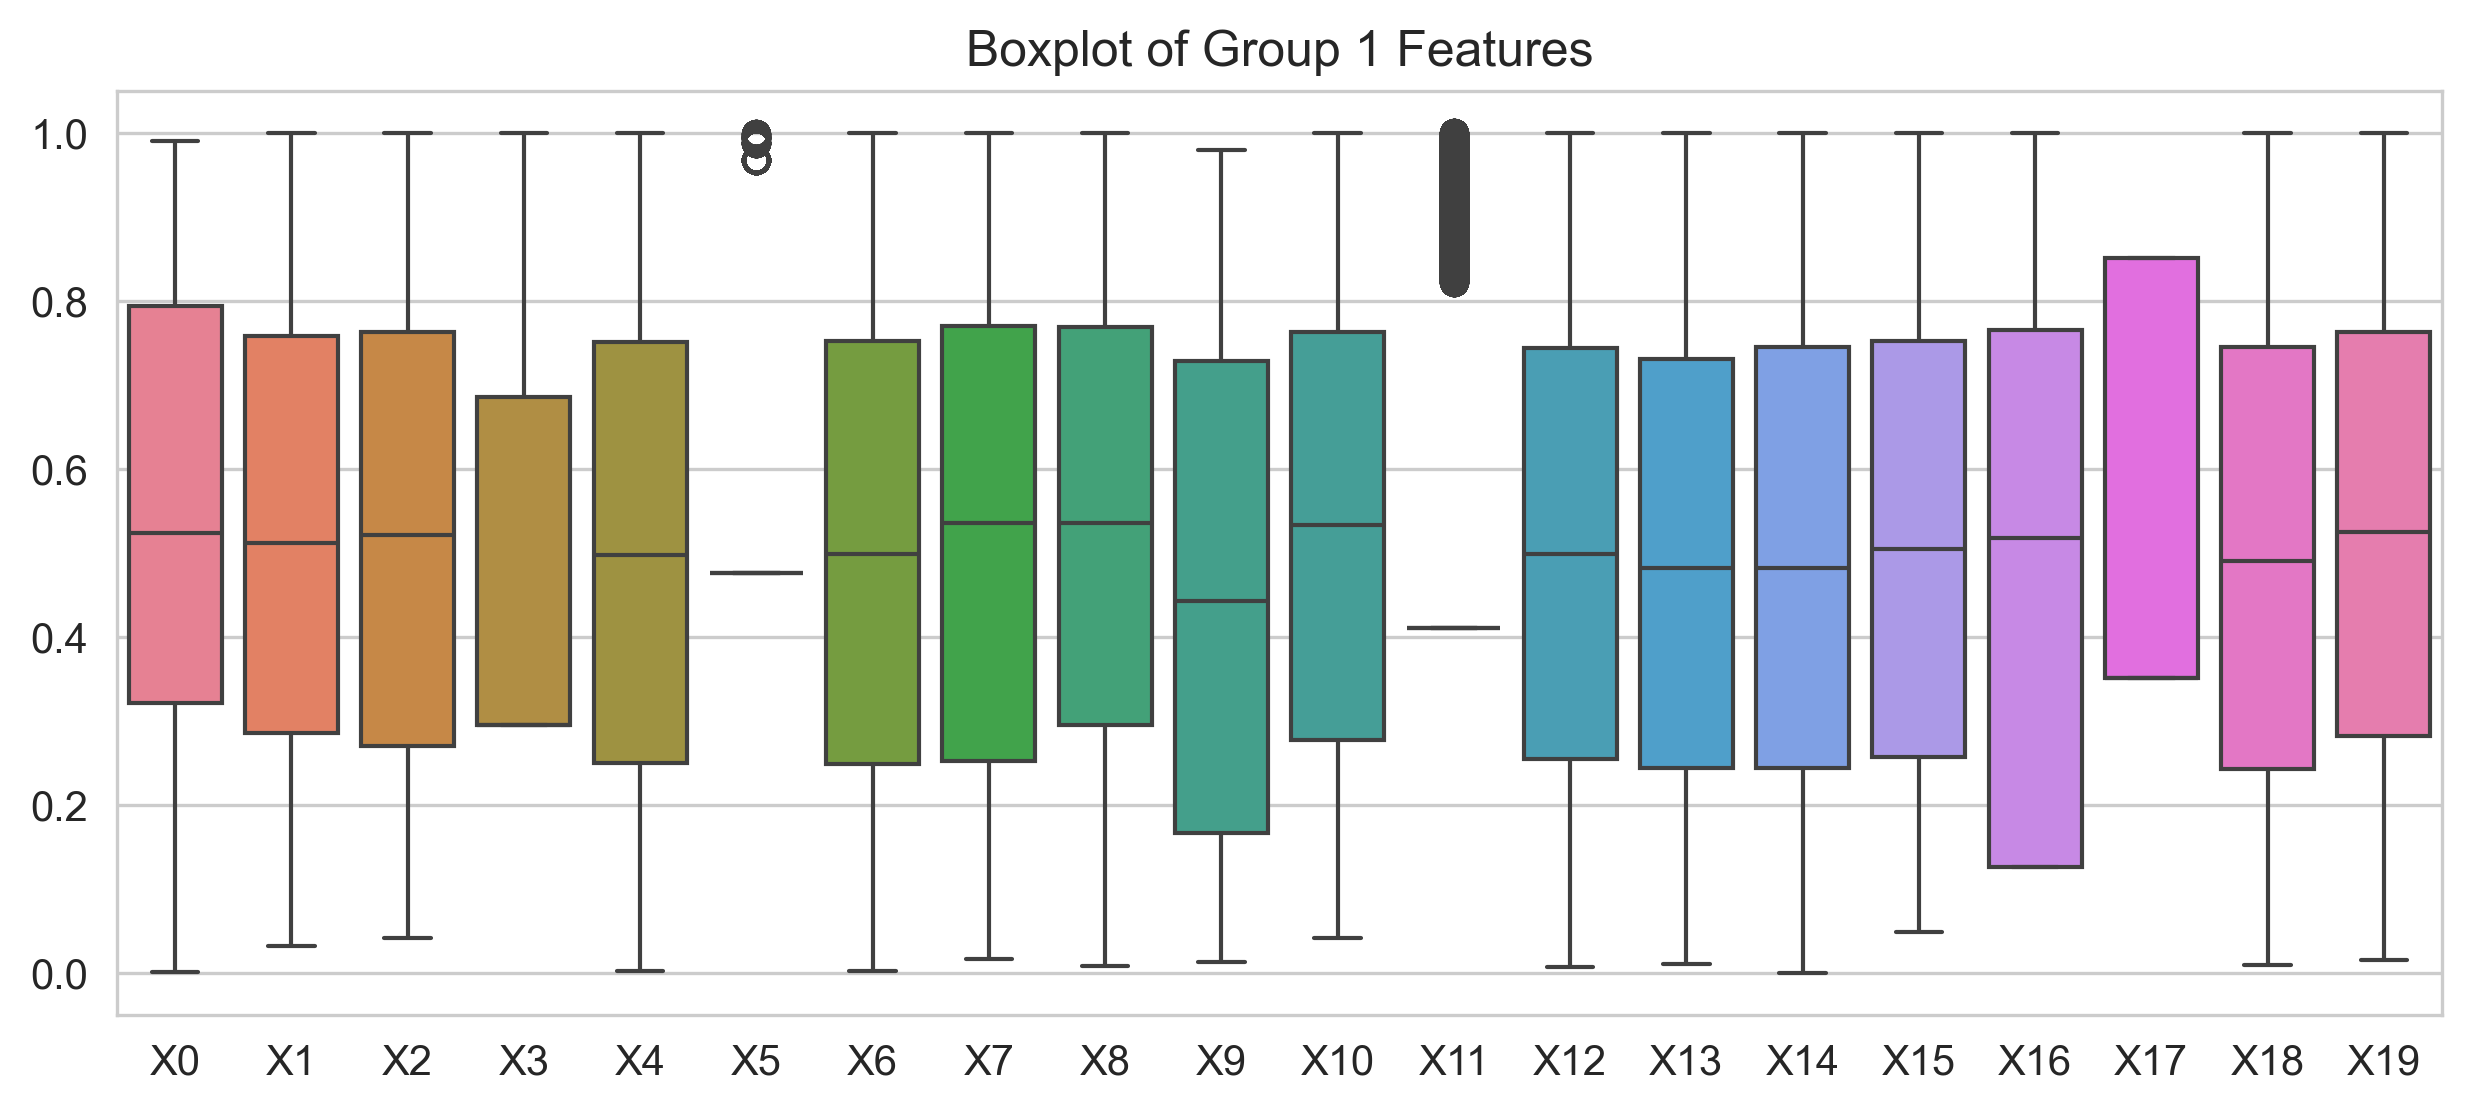

In [17]:
# g1的特征箱线图
plt.figure(figsize=(10, 4), dpi=300)
sns.boxplot(train_data[feature_groups[0]])
plt.title('Boxplot of Group 1 Features')
plt.show()

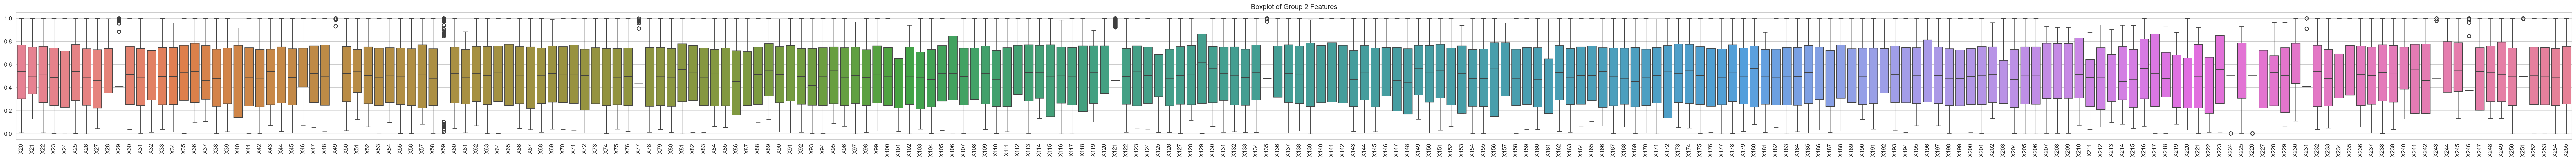

In [18]:
# g2特征的箱线图
plt.figure(figsize=(80, 4), dpi=200)
sns.boxplot(train_data[feature_groups[1]])
plt.title('Boxplot of Group 2 Features')
plt.xticks(rotation=90)
plt.savefig('./imgs/boxplot_g2.png')
plt.show()

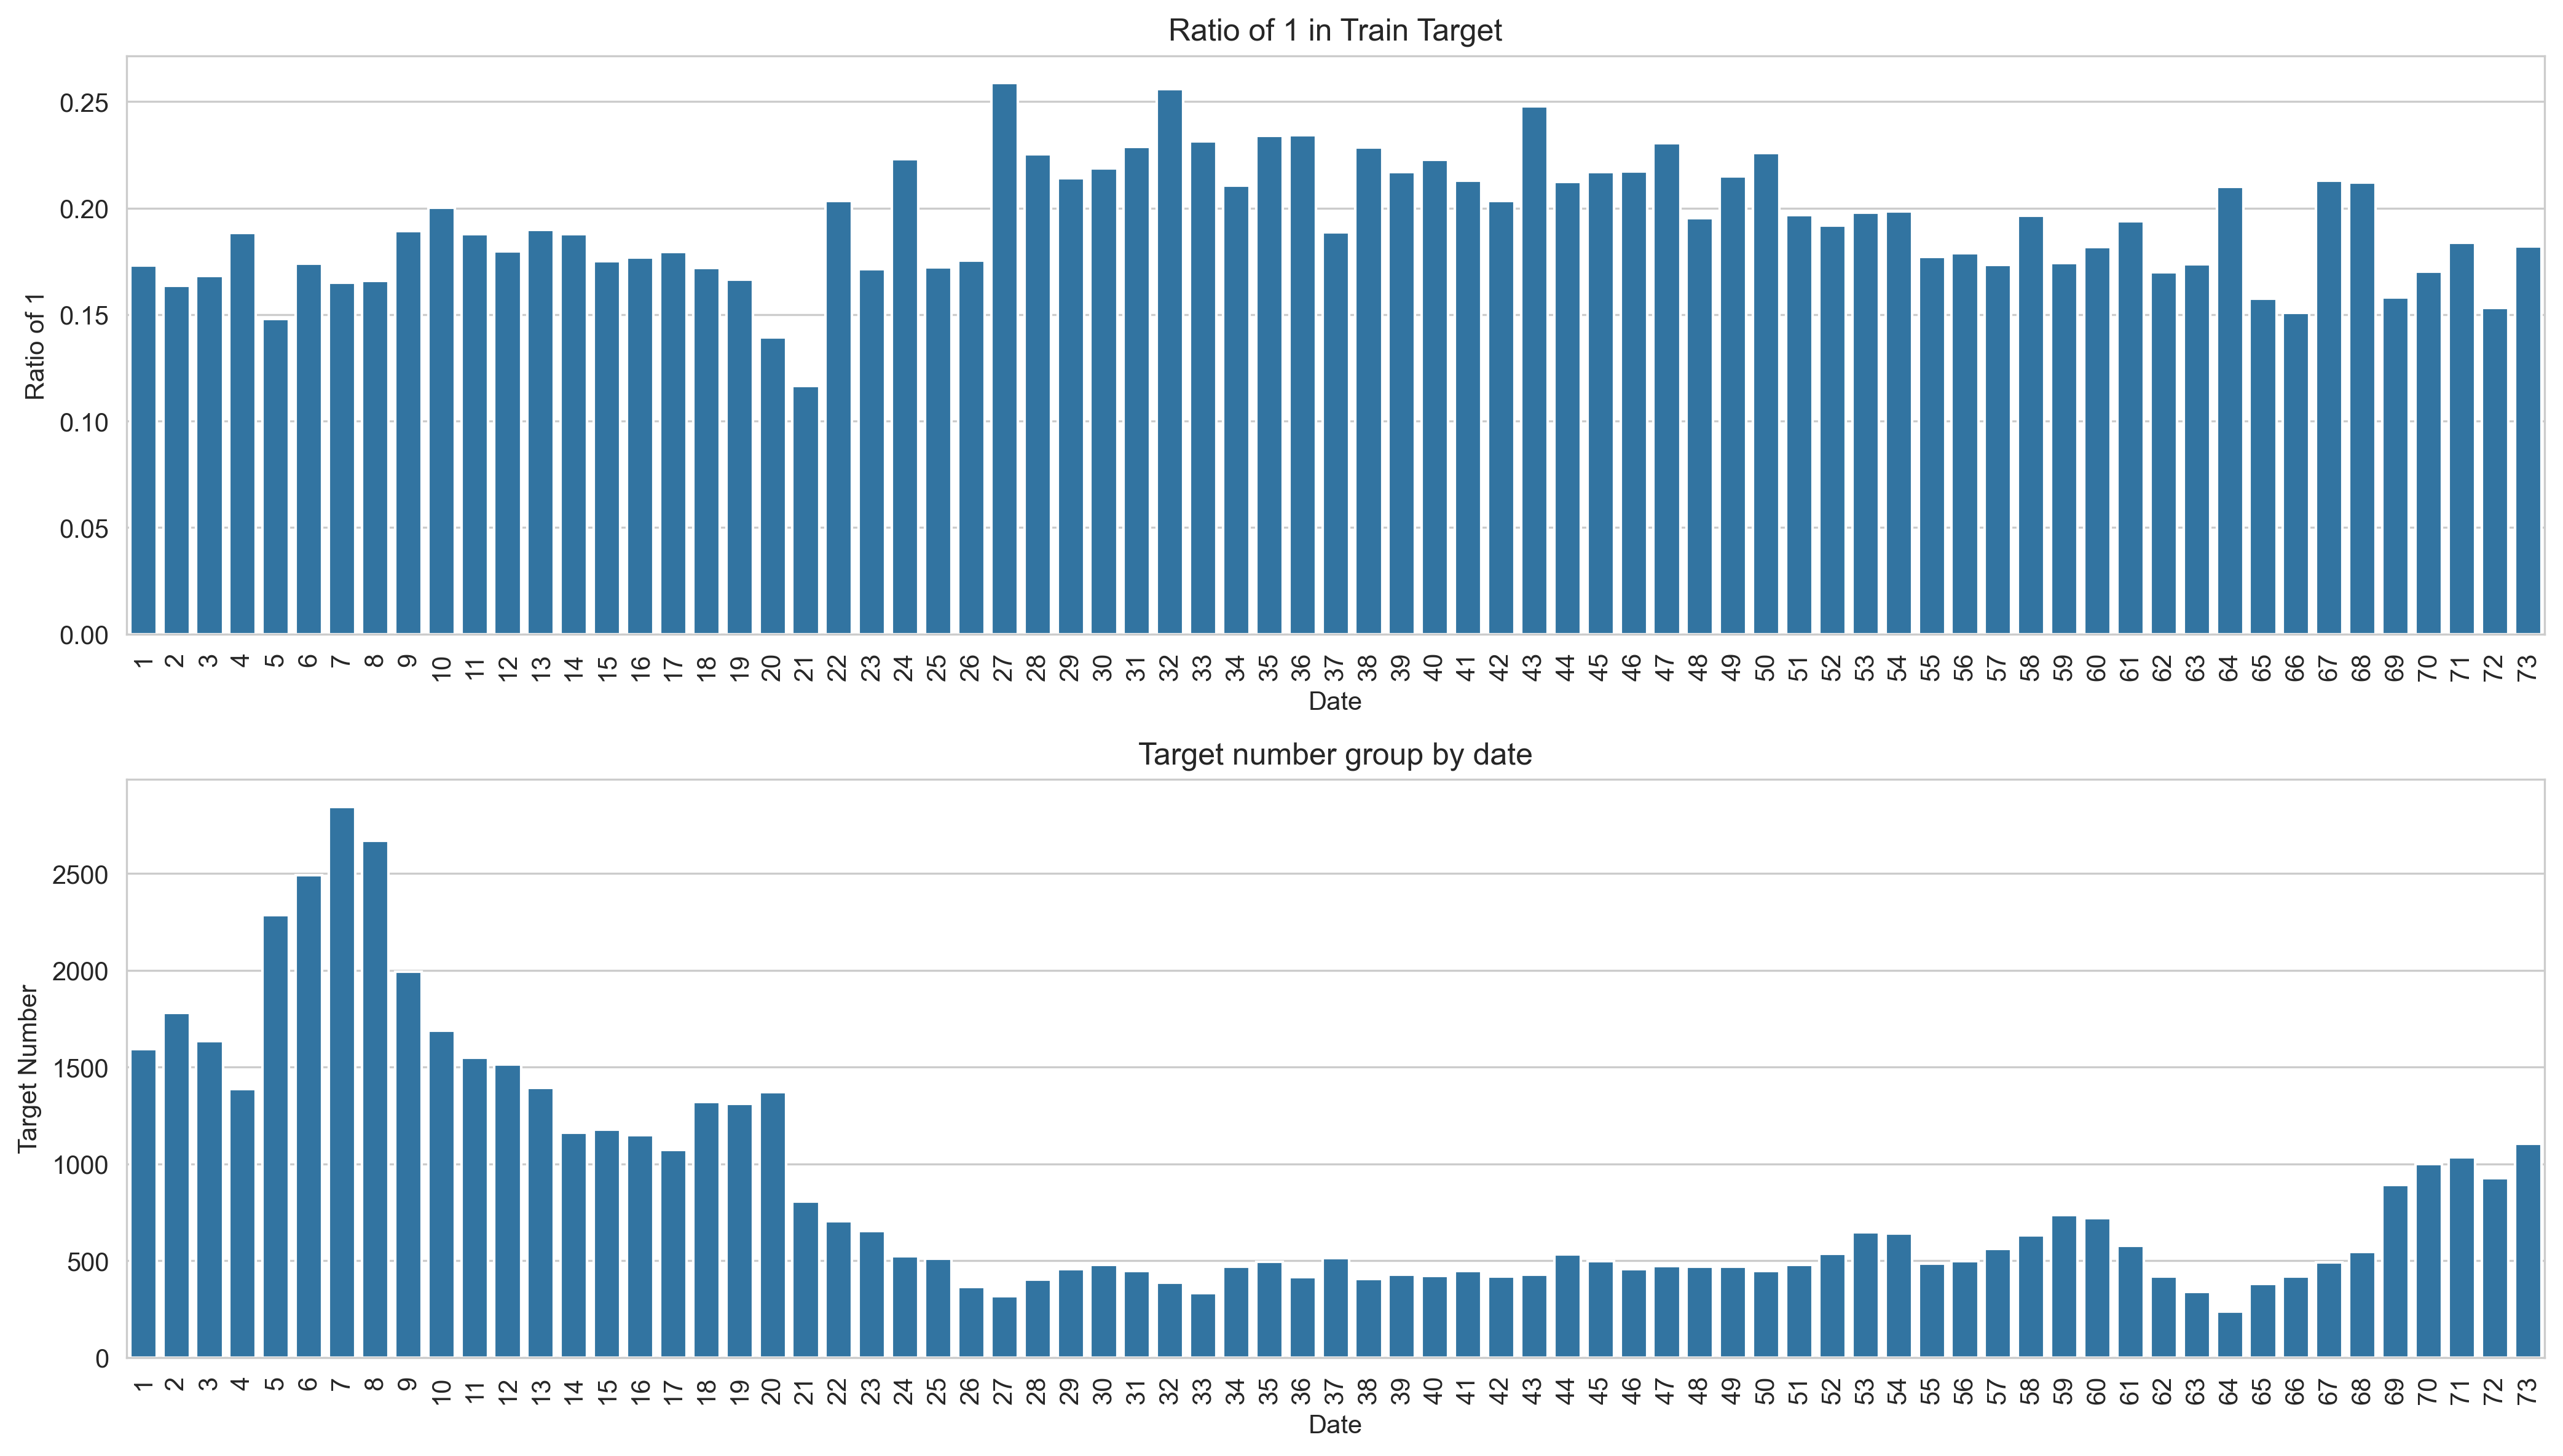

In [19]:
# 统计不同date对应的0,1的占比
date_uni = train_target.date.unique()
date_target_ratio = pd.DataFrame(columns=['date', 'ratio1', 'ratio0', 'target_number'])
temp = []
for date in date_uni:
    df_date = train_target[train_target.date == date]
    ratio1 = df_date.y.sum() / len(df_date)
    ratio0 = 1 - ratio1
    traget_number = len(df_date)
    temp.append([date, ratio1, ratio0, traget_number])
date_target_ratio = pd.DataFrame(temp, columns=['date', 'ratio1', 'ratio0', 'target_number'])

# 绘制柱状图
plt.figure(figsize=(14, 8), dpi=300)

plt.subplot(2, 1, 1)
sns.barplot(x='date', y='ratio1', data=date_target_ratio)
plt.title('Ratio of 1 in Train Target')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Ratio of 1')
plt.tight_layout()

plt.subplot(2, 1, 2)
sns.barplot(x='date', y='target_number', data=date_target_ratio)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Target Number')
plt.title('Target number group by date')
plt.tight_layout()

plt.show()

#### 相关性

In [20]:
# corrwith 方法计算的是 皮尔森相关性（Pearson correlation）与 斯皮尔曼等级相关性（Spearman rank correlation）之间的混合相关性
# g1特征与target相关性计算
corr1 = train_data[feature_groups[0]].corrwith(train_target.y)
# g2特征与target相关性计算
corr2 = train_data[feature_groups[1]].corrwith(train_target.y)
# g3特征与target相关性计算
corr3 = train_data[feature_groups[2]].corrwith(train_target.y)

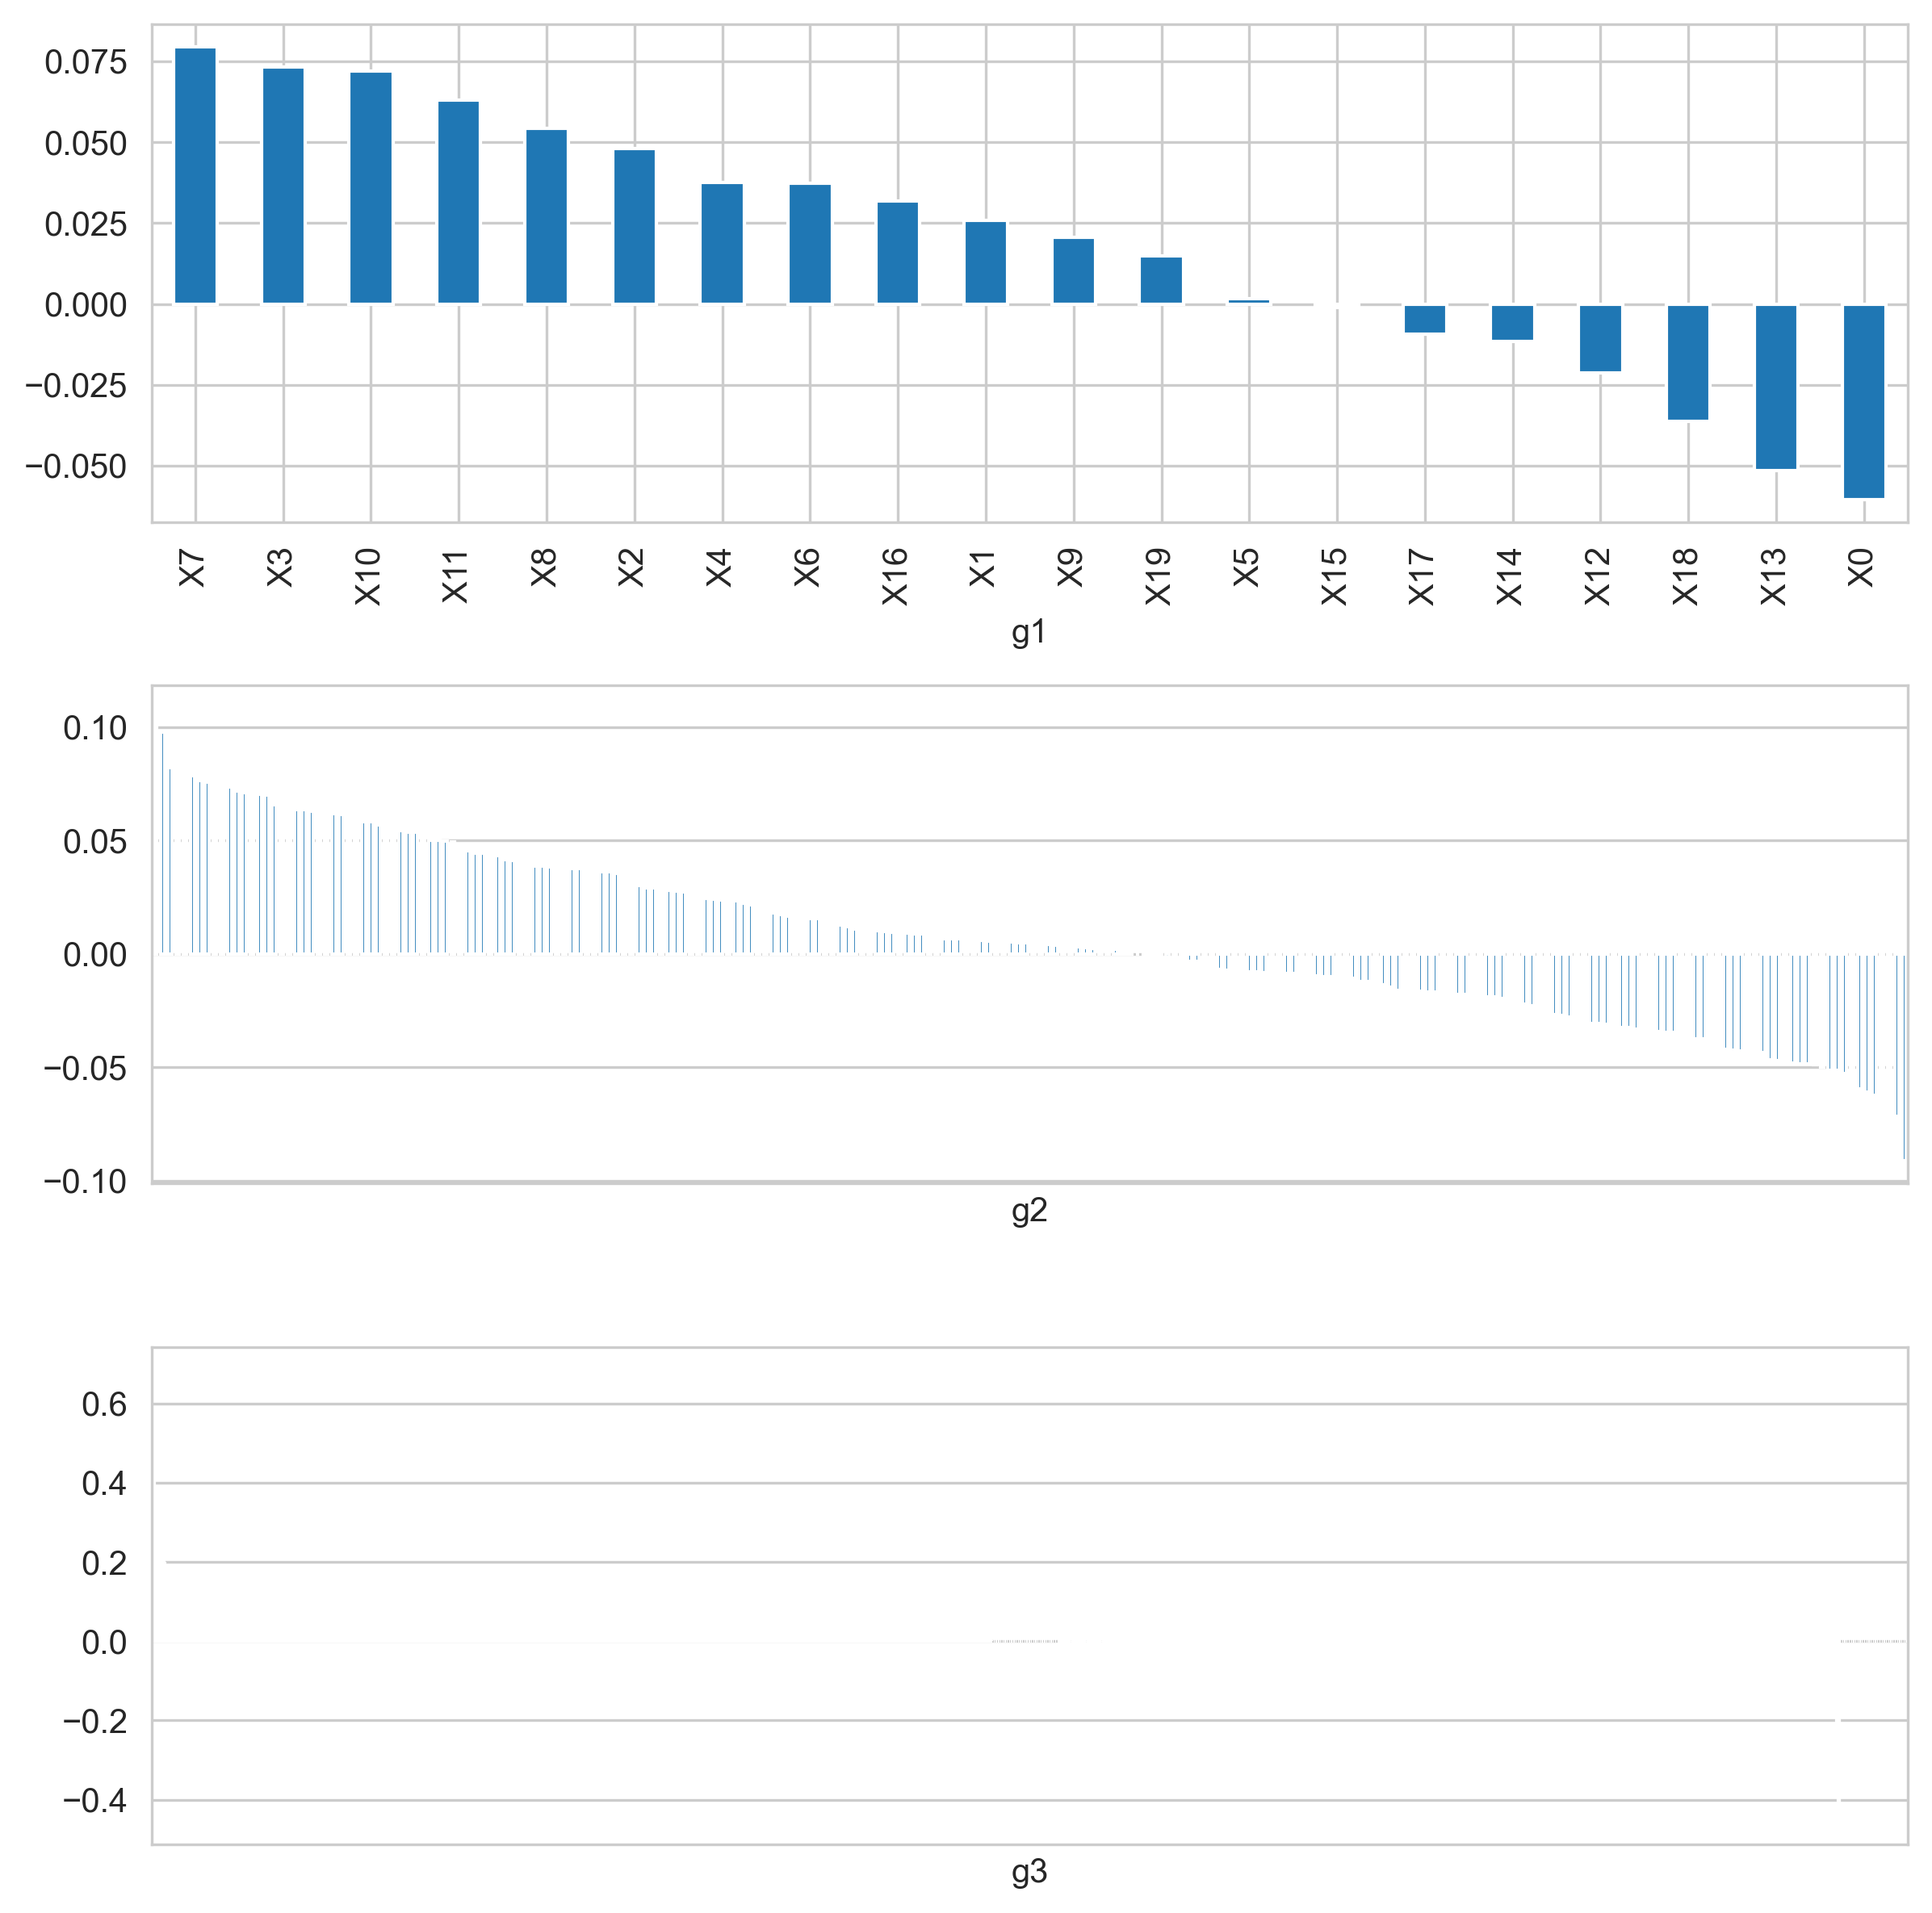

In [21]:
plt.figure(figsize=(8, 8), dpi=300)
plt.subplot(3, 1, 1)
corr1.sort_values(ascending=False).plot(kind='bar', xlabel='g1')

plt.subplot(3, 1, 2)
corr2.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='g2') 

plt.subplot(3, 1, 3)
corr3.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='g3')

plt.tight_layout()
plt.savefig('./imgs/corr.png')
plt.show()

#### 特征选择

剔除缺失值过高的特征

In [22]:
drop_features_g1 = missing_ratio_g1[missing_ratio_g1 > 0.5]
drop_features_g2 = missing_ratio_g2[missing_ratio_g2 > 0.5]
drop_features_g3 = missing_ratio_g3[missing_ratio_g3 > 0.5]
# 从剔除的特征中保留相关性较高的特征
# 记录被重新保留的特征
resaved_features_g1 = []
resaved_features_g2 = []
resaved_features_g3 = []
q3 = np.percentile(corr1, 75), np.percentile(corr2, 75), np.percentile(corr3.dropna(), 80)
for i in drop_features_g1.index:
    if corr1[i] >= q3[0]:
        drop_features_g1 = drop_features_g1.drop(i)
        resaved_features_g1.append((i,corr1[i]))

for i in drop_features_g2.index:
    if corr2[i] >= q3[1]:
        drop_features_g2 = drop_features_g2.drop(i)
        resaved_features_g2.append((i,corr2[i]))

nan_count = 0
for i in drop_features_g3.index:
    if corr3[i] >= q3[2] and corr3[i]!= np.nan:
        drop_features_g3 = drop_features_g3.drop(i)
        resaved_features_g3.append((i,corr3[i]))

# 三组特征的丢弃比例与丢弃特征名称
print(q3)
print(f'g1丢弃比例：{len(drop_features_g1.index)}/{len(feature_groups[0])}')
print(f'g2丢弃比例：{len(drop_features_g2.index)}/{len(feature_groups[1])}')
print(f'g3丢弃比例：{len(drop_features_g3.index)}/{len(feature_groups[2])}')
print(resaved_features_g1, '\n', resaved_features_g2, '\n', resaved_features_g3)
# 计算重新纳入特征的比例
print(f'g1重新纳入/丢弃：{len(resaved_features_g1)}/{len(drop_features_g1)}')
print(f'g2重新纳入/丢弃：{len(resaved_features_g2)}/{len(drop_features_g2)}')
print(f'g3重新纳入/丢弃：{len(resaved_features_g3)}/{len(drop_features_g3)}')
# 最终保留特征占比
print()
print(f'g1最终保留比例：{len(feature_groups[0])-len(drop_features_g1)+len(resaved_features_g1)}/{len(feature_groups[0])}')
print(f'g2最终保留比例：{len(feature_groups[1])-len(drop_features_g2)+len(resaved_features_g2)}/{len(feature_groups[1])}')
print(f'g3最终保留比例：{len(feature_groups[2])-len(drop_features_g3)+len(resaved_features_g3)}/{len(feature_groups[2])}')

(0.04963812273764458, 0.03723282550563678, 0.02643565054655039)
g1丢弃比例：3/20
g2丢弃比例：19/236
g3丢弃比例：1899/3550
[('X3', 0.07332130169388969)] 
 [('X146', 0.09788410985190386), ('X141', 0.076388961128056), ('X127', 0.037550581756626344), ('X157', 0.04047422185145275), ('X145', 0.03759788392500064), ('X175', 0.041659364097351506), ('X118', 0.05883249599273473), ('X139', 0.03824967807531801)] 
 [('X3592', 0.5703518254720302), ('X3624', 0.3333333333333334), ('X664', 0.408248290463863), ('X3603', 0.6852482888641928), ('X665', 0.052027715857262555), ('X2641', 0.21821789023599242), ('X2640', 0.21821789023599242), ('X2642', 0.21821789023599242), ('X3614', 0.4395501308811567), ('X3612', 0.09521753968356396), ('X2650', 0.2277100170213244), ('X2651', 0.2277100170213244), ('X1213', 0.063983150041353), ('X2652', 0.2277100170213244), ('X3586', 0.09923961272046179), ('X688', 0.45643546458763856), ('X3589', 0.15735776513141703), ('X2659', 0.3012436913118928), ('X2658', 0.3012436913118928), ('X2657', 0.3012

In [23]:
# 最终保留的特征
try:
    corr1 = corr1.drop(drop_features_g1)
    corr2 = corr2.drop(drop_features_g2)
    corr3 = corr3.drop(drop_features_g3)
except:
    ...
print(len(corr1), len(corr2), len(corr3))


20 236 3550


方差检验与递归特征消除

In [24]:
from scipy.stats import kruskal
def kruskal_feature_selection(train_data, train_target, k=10):
    """
    使用Kruskal-Wallis H检验进行特征选择

    参数：
        train_data (pd.DataFrame)：训练数据
        train_target (pd.Series)：训练目标变量
        k (int)：选择的特征数量

    返回：
        selected_features (list)：选择的特征列表
    """
    # 筛选显著差异的特征组
    significant_groups = []
    for feature in train_data.columns:
        h_stat, p_val = kruskal(train_data[feature], train_target)
        if p_val < 0.05:
            significant_groups.append((feature, h_stat))

    # 计算特征的重要性
    importance = [h_stat for _, h_stat in significant_groups]

    # 排序特征组
    sorted_groups = sorted(significant_groups, key=lambda x: x[1], reverse=True)

    # 选择最重要的特征组
    selected_features = [feature for feature, _ in sorted_groups[:k]]

    return selected_features

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def rfecv_feature_selection(X, y, estimator=LogisticRegression(), step=1, cv=5):
    """
    使用 RFECV 进行特征选择

    参数：
        X (pd.DataFrame)：特征数据
        y (pd.Series)：目标变量
        estimator (object)：模型对象，默认为 LogisticRegression
        step (int)：每次删除的特征数量，默认为 1
        cv (int)：交叉验证的折数，默认为 5

    返回：
        features (list)：选择的特征列表
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    selector = RFECV(estimator=estimator, step=step, cv=cv, n_jobs=-1, verbose=2)
    selector.fit(X_train, y_train)
    support = selector.support_
    features = X.columns[support]
    return features

In [26]:
# 选取特征组
# 特征组1
corr1_filtered = corr1[abs(corr1)>=0.02]
selected_g1_f1 = kruskal_feature_selection(train_data[corr1_filtered.index.tolist()], train_target['y'], k=round(len(corr1_filtered)*0.8))
selected_g1_f2 = rfecv_feature_selection(train_data[corr1_filtered.index.tolist()].fillna(train_data[corr1_filtered.index.tolist()].median()), train_target['y'])
print(selected_g1_f1)
print(selected_g1_f2)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
['X0', 'X7', 'X10', 'X8']
Index(['X0', 'X2', 'X3', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13',
       'X16', 'X18'],
      dtype='object')


In [27]:
selected_g1_merge = list(set(selected_g1_f1) | set(selected_g1_f2))
len(selected_g1_merge)

13

In [28]:
# 特征组2
corr2_filtered = corr2[abs(corr2)>=0.02]
selected_g2_f1 = kruskal_feature_selection(train_data[corr2_filtered.index.tolist()], train_target['y'], k=round(len(corr2_filtered)*0.8))
print(selected_g2_f1)
selected_g2_f2 = rfecv_feature_selection(train_data[corr2_filtered.index.tolist()].fillna(train_data[corr2_filtered.index.tolist()].median()), train_target['y'])
print(selected_g2_f2)

['X29', 'X125', 'X196', 'X65', 'X87', 'X149', 'X36', 'X67', 'X130', 'X142', 'X134', 'X20', 'X137', 'X178', 'X105', 'X64', 'X144', 'X113', 'X25', 'X35', 'X155']
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113

In [29]:
selected_g2_merge = list(set(selected_g2_f1) | set(selected_g2_f2))
len(selected_g2_merge)

69

In [ ]:
# 特征组3(全部被丢弃，失去参考意义)
# corr3_filtered = corr3[abs(corr3)>=0.08]
# selected_g3_f1 = kruskal_feature_selection(train_data[corr3_filtered.index.tolist()], train_target['y'], k=round(len(corr3_filtered)*0.8))
# print(selected_g3_f1)
# selected_g3_f2 = rfecv_feature_selection(train_data[corr3_filtered.index.tolist()].fillna(train_data[corr3_filtered.index.tolist()].median()), train_target['y'])
# print(selected_g3_f2)

[]


PCA降维

In [30]:
from sklearn.decomposition import PCA

In [31]:
# 填充缺失值
train_data[selected_g1_merge] = train_data[selected_g1_merge].fillna(train_data[selected_g1_merge].median())
train_data[selected_g2_merge] = train_data[selected_g2_merge].fillna(train_data[selected_g2_merge].median())

In [32]:
# 对g1降维
pca1 = PCA(n_components=0.95, svd_solver='full')
pca1.fit(train_data[selected_g1_merge], train_target['y'])
reduced_features_g1 = pca1.transform(train_data[selected_g1_merge])

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_ratio_.sum())
print(pca1.n_components_)

[0.3173203  0.18606604 0.16611391 0.08480667 0.05109744 0.04888824
 0.04551896 0.03325188 0.0193464 ]
0.952409828895259
9


In [33]:
# 对g2降维
pca2 = PCA(n_components=0.95, svd_solver='full')
pca2.fit(train_data[selected_g2_merge], train_target['y'])
reduced_features_g2 = pca2.transform(train_data[selected_g2_merge])

print(pca2.explained_variance_ratio_)
print(pca2.explained_variance_ratio_.sum())
print(pca2.n_components_)

[0.33568347 0.09286925 0.06217384 0.04860619 0.0337595  0.03235255
 0.03034271 0.02655141 0.02592508 0.02423211 0.02109755 0.02077401
 0.01659325 0.01456753 0.01403283 0.01311927 0.01255494 0.01140716
 0.01051003 0.0102241  0.00998921 0.00893856 0.00851912 0.00823
 0.0078076  0.00730104 0.00633438 0.00553501 0.00541433 0.00526803
 0.00513235 0.00496661 0.00489247 0.00471847]
0.9504239129123006
34


In [34]:
# 对g3降维
corr3_filtered = corr3[abs(corr3)>=0.08]
pca3 = PCA(n_components=0.95, svd_solver='full')
pca3.fit(train_data[corr3_filtered.index.tolist()].fillna(train_data[corr3_filtered.index.tolist()].median()), train_target['y'])
reduced_features_g3 = pca3.transform(train_data[corr3_filtered.index.tolist()].fillna(train_data[corr3_filtered.index.tolist()].median()))

print(pca3.explained_variance_ratio_)
print(pca3.explained_variance_ratio_.sum())
print(pca3.n_components_)

[0.57948685 0.09079911 0.08767452 0.08583745 0.05657736 0.03881324
 0.02588749]
0.9650760113539677
7


#### 合并数据

In [35]:
# 合并训练数据
train_data_g1 = pd.DataFrame(reduced_features_g1, columns=[f'g1_pca_{i}' for i in range(pca1.n_components_)])
train_data_g2 = pd.DataFrame(reduced_features_g2, columns=[f'g2_pca_{i}' for i in range(pca2.n_components_)])
train_data_g3 = pd.DataFrame(reduced_features_g3, columns=[f'g3_pca_{i}' for i in range(pca3.n_components_)])
train_data_g1 = train_data_g1.reset_index(drop=True)
train_data_g2 = train_data_g2.reset_index(drop=True)

train_data_processed = pd.concat([train_data_g1, train_data_g2, train_data_g3], axis=1)

In [36]:
# 合并测试数据
test_data[selected_g1_merge] = test_data[selected_g1_merge].fillna(test_data[selected_g1_merge].median())
test_data[selected_g2_merge] = test_data[selected_g2_merge].fillna(test_data[selected_g2_merge].median())

test_data_g1 = pca1.transform(test_data[selected_g1_merge])
test_data_g2 = pca2.transform(test_data[selected_g2_merge])
test_data_g3 = pca3.transform(test_data[corr3_filtered.index.tolist()].fillna(test_data[corr3_filtered.index.tolist()].median()))

test_data_g1 = pd.DataFrame(test_data_g1, columns=[f'g1_pca_{i}' for i in range(pca1.n_components_)])
test_data_g2 = pd.DataFrame(test_data_g2, columns=[f'g2_pca_{i}' for i in range(pca2.n_components_)])
test_data_g3 = pd.DataFrame(test_data_g3, columns=[f'g3_pca_{i}' for i in range(pca3.n_components_)])

test_data_g1 = test_data_g1.reset_index(drop=True)
test_data_g2 = test_data_g2.reset_index(drop=True)
test_data_processed = pd.concat([test_data_g1, test_data_g2, test_data_g3], axis=1)

In [38]:
# 保存数据
train_data_processed.to_csv(os.path.join(train_folder, 'train_data_processed.csv'), index=False)
test_data_processed.to_csv(os.path.join(test_folder, 'test_data_processed.csv'), index=False)

仍旧有待探索改进的点：
1. 没有对实例进行drop，只进行了特征列的drop
2. 尝试对数据进行聚类，分为特征聚类和实例聚类
3. 类似X0这样的数据分布形式，是否对应时间段或者和时序有关